# Simple Linear Regression TRM-LEMB
Developed by Cristian Quintero

Here a small regression analysis to see if the correlation among TRM and DXY index level have relevance.

__LEMB ETF__ Is an ETF named --iShares JP Morgan EM Local Currency Bond--. It is composed by debt issued by goverments in Emergin Markets, and some amounts in currencies [see 1](https://www.ishares.com/us/products/239528/).

First, as any regression made in python, we have to import some libraries. In this case we will import the basic pandas and numpy libraries. After we will use sklearn to get access to linear_model class which is in charge of calculate the linear regression.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now, we will import LEMB and TRM data, which are into Datos.xlsx and Datos_test.xlsx files. The first one is the data to get the regression parameters, and second one is to test the regression. The data are between 2014/10/24 and 2017/11/04.

In [2]:
# Lectura de las variables a utilizar en la regresion lineal
data_all = pd.read_excel('../data_source/Datos.xlsx','Datos')
test_cnt_data = 50
cnt_data = len(data_all)
data = data_all.tail(cnt_data - test_cnt_data)
data_test = data_all.head(test_cnt_data)
label_x = 'LEMB'

Using linear_model, calculate regression using OLS. To get more information about it, see [linear_model](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

In [3]:
y = data['TRM'].values
x = data[label_x].values
x = sm.add_constant(x)

# Note the difference in argument order
model = sm.OLS(y, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Return X to original matrix
x = x[:,1:2].T[0]

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     237.0
Date:                Sun, 04 Feb 2018   Prob (F-statistic):           3.14e-47
Time:                        16:43:29   Log-Likelihood:                -5749.6
No. Observations:                 831   AIC:                         1.150e+04
Df Residuals:                     829   BIC:                         1.151e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5167.8372    149.037     34.675      0.000    4875.303    5460.372
x1           -51.6087      3.352    -15.396      0.000     -58.188     -45.029
==============================================================================
Omnibus:                       85.412   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.914
Skew:                          -0.818   Prob(JB):                     2.01e-22
Kurtosis:                       2.541   Cond. No.                         780.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we will predict TRM values taking in count the regression coefficients, over test values got above.

In [4]:
x_test = data_test[label_x].values
y_test = model.predict(sm.add_constant(x_test))
mse = mean_squared_error(y_test, y[-len(y_test):])
print('* MSE (Mean Square Error) : %.2f' %  mse)
print('  -      square root(mse) : %.2f' %  math.sqrt(mse))


* MSE (Mean Square Error) : 193835.76
  -      square root(mse) : 440.27


After we had gotten the TRM predicted values, we can plot the result, and see how the regression result adjust to the initial values.

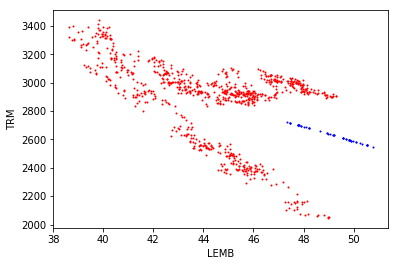

In [5]:
plt.scatter(x, y, color='red', s=1)
plt.scatter(x_test, y_test, color='blue', s=1)
plt.ylabel("TRM")
plt.xlabel(label_x)
plt.show()

Dots in red color are observations which we had into --Datos.xlsx-- file, while blue dots are the prediction using the --Datos_test.xlsx-- data, after calculate coefficients with linear_model library. As you can see, the predictions take a line form but is delimited by predictions range values.

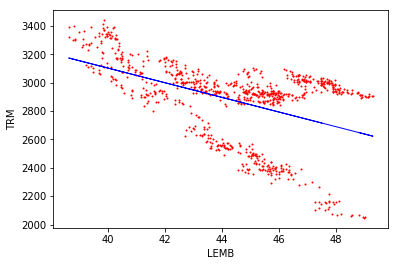

In [6]:
plt.scatter(x, y, color='red', s=1)
plt.plot(x, model.predict(sm.add_constant(x)), color='blue', linewidth=1)
plt.ylabel("TRM")
plt.xlabel(label_x)
plt.show()

__Conclusion__ Pending*

__Note__ The coefficient result, is not a really true value which indicate absolute value of increment or decrement way, but can be used as reference to see which way will take TRM based on explanatory variable price movements.